In [2]:
import pandas as pd

In [3]:
df_BA = pd.read_csv("burned_area.csv")
df_BA.head()

,year,month,gid_0,country,gid_1,region,forest,savannas,shrublands_grasslands,croplands,other
0,2002,1,AFG,Afghanistan,AFG.10_1,Ghor,0.0,0.0,0.0,0.0,0.0
1,2002,1,AFG,Afghanistan,AFG.11_1,Hilmand,0.0,0.0,0.0,0.0,0.0
2,2002,1,AFG,Afghanistan,AFG.12_1,Hirat,0.0,0.0,0.0,0.0,0.0
3,2002,1,AFG,Afghanistan,AFG.13_1,Jawzjan,0.0,0.0,0.0,0.0,0.0
4,2002,1,AFG,Afghanistan,AFG.14_1,Kabul,0.0,0.0,0.0,0.0,0.0


In [4]:
columns_to_drop = ['gid_0','gid_1', 'savannas', 'shrublands_grasslands','croplands', 'other']
df_BA = df_BA.drop(columns=columns_to_drop)
df_BA.head()

,year,month,country,region,forest
0,2002,1,Afghanistan,Ghor,0.0
1,2002,1,Afghanistan,Hilmand,0.0
2,2002,1,Afghanistan,Hirat,0.0
3,2002,1,Afghanistan,Jawzjan,0.0
4,2002,1,Afghanistan,Kabul,0.0


In [5]:
df_brazil_BA = df_BA[df_BA['country'] == 'Brazil']
df_brazil_BA.head()

,year,month,country,region,forest
330,2002,1,Brazil,Maranhão,0.000
331,2002,1,Brazil,Mato Grosso do Sul,21.466
332,2002,1,Brazil,Mato Grosso,0.000
333,2002,1,Brazil,Minas Gerais,0.000
334,2002,1,Brazil,Pará,64.398


In [6]:
regions_to_have = ['Maranhão', 'Mato Grosso', 'Pará', 'Acre', 'Rondônia', 'Roraima', 'Tocantins'
                  , 'Amazonas', 'Amapá']       
df_region = df_brazil_BA[df_brazil_BA['region'].isin(regions_to_have)]

df_region.head()

,year,month,country,region,forest
330,2002,1,Brazil,Maranhão,0.000
332,2002,1,Brazil,Mato Grosso,0.000
334,2002,1,Brazil,Pará,64.398
340,2002,1,Brazil,Acre,0.000
343,2002,1,Brazil,Rondônia,0.000


In [7]:
df_filtered = df_region[(df_region['year'] >= 2004) & (df_region['year'] <= 2019)]
df_filtered.head()

,year,month,country,region,forest
86970,2004,1,Brazil,Maranhão,21.466
86972,2004,1,Brazil,Mato Grosso,214.659
86974,2004,1,Brazil,Pará,343.454
86980,2004,1,Brazil,Acre,0.000
86983,2004,1,Brazil,Rondônia,42.932


In [8]:
df_yearly_region = df_filtered.groupby(['region', 'year']).agg({
    'forest': 'sum'  # Aggregate 'forest' by summing monthly data for the year
}).reset_index()
df_yearly_region.head(20)

,region,year,forest
0,Acre,2004,23118.740
1,Acre,2005,110742.408
2,Acre,2006,13459.099
3,Acre,2007,14253.336
4,Acre,2008,7963.836
5,Acre,2009,1202.088
6,Acre,2010,31104.041
7,Acre,2011,1717.269
8,Acre,2012,5366.467
9,Acre,2013,2189.519


In [9]:
df_pivot = df_yearly_region.pivot(index='year', columns='region', values='forest').reset_index()
df_pivot.head()

region,year,Acre,Amapá,Amazonas,Maranhão,Mato Grosso,Pará,Rondônia,Roraima,Tocantins
0,2004,23118.740,7126.668,56755.754,43919.165,1052450.008,665484.820,280945.272,18868.498,15391.026
1,2005,110742.408,4314.639,146869.464,164106.555,888193.193,867886.482,371617.094,321.988,25437.053
2,2006,13459.099,472.250,103014.696,20456.972,489464.708,346781.086,220196.867,3262.813,4722.491
3,2007,14253.336,772.772,89684.395,341264.361,1182941.017,848867.723,246599.884,54823.825,67767.743
4,2008,7963.836,4293.173,62014.891,19555.404,283370.912,377477.277,79402.244,5065.945,20349.642


In [10]:
df_pivot['total'] = df_pivot.iloc[:, 1:].sum(axis=1)
df_pivot.head()

region,year,Acre,Amapá,Amazonas,Maranhão,Mato Grosso,Pará,Rondônia,Roraima,Tocantins,total
0,2004,23118.740,7126.668,56755.754,43919.165,1052450.008,665484.820,280945.272,18868.498,15391.026,2164059.951
1,2005,110742.408,4314.639,146869.464,164106.555,888193.193,867886.482,371617.094,321.988,25437.053,2579488.876
2,2006,13459.099,472.250,103014.696,20456.972,489464.708,346781.086,220196.867,3262.813,4722.491,1201830.982
3,2007,14253.336,772.772,89684.395,341264.361,1182941.017,848867.723,246599.884,54823.825,67767.743,2846975.056
4,2008,7963.836,4293.173,62014.891,19555.404,283370.912,377477.277,79402.244,5065.945,20349.642,859493.324


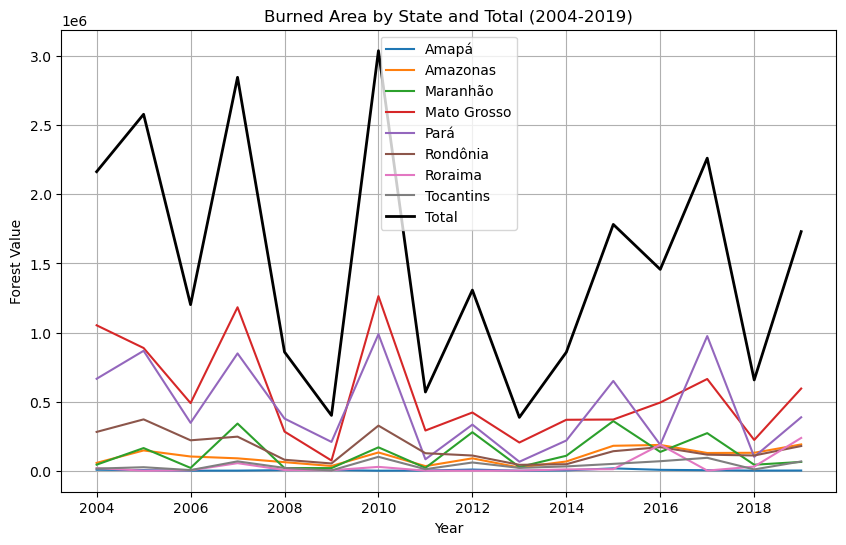

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame

df = df_pivot

# Plotting
plt.figure(figsize=(10, 6))

# Plot each state's data
for state in df.columns[2:-1]:  # All states (excluding 'region' and 'total')
    plt.plot(df['year'], df[state], label=state)

# Plot total data
plt.plot(df['year'], df['total'], label='Total', color='black', linewidth=2)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Forest Value')
plt.title('Burned Area by State and Total (2004-2019)')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [12]:
df_pivot.to_excel('dataframe.xlsx', index=False)

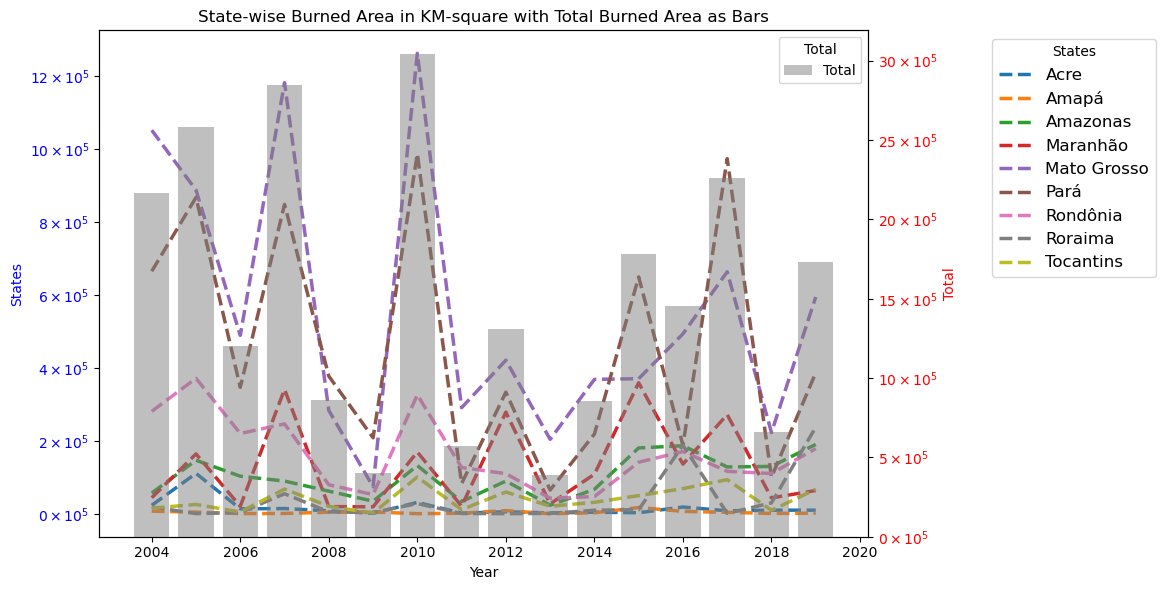

In [13]:
# Load the Excel file to inspect its structure
from matplotlib.ticker import FuncFormatter, MaxNLocator
file_path = 'dataframe.xlsx'
data = pd.ExcelFile(file_path)

# Check sheet names and preview data from the first sheet
data.sheet_names, data.parse(data.sheet_names[0]).head()# Plot setup with total as bars
fig, ax1 = plt.subplots(figsize=(12, 6))
states = df.columns[1:-1]
# Plot state data on the left y-axis
for state in states:
    ax1.plot(df['year'], df[state], label=state, linewidth=2.5, linestyle='--', alpha=1)

def format_exponent(x, pos):
    return r'${:g} \times 10^{{5}}$'.format(x / 1e5)
ax1.yaxis.set_major_formatter(FuncFormatter(format_exponent))
    
ax1.set_xlabel('Year')
ax1.set_ylabel('States', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left', bbox_to_anchor=(1.15, 1), title="States", fontsize='large')


ax2 = ax1.twinx()
ax2.bar(df['year'], df['total'], label='Total', color='grey', alpha=0.5, width=0.8)
ax2.yaxis.set_major_formatter(FuncFormatter(format_exponent))

ax2.set_ylabel('Total', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right', title="Total")

# Title and layout adjustments
plt.title('State-wise Burned Area in KM-square with Total Burned Area as Bars')
fig.tight_layout()
plt.savefig('BA_Bar.png')
plt.show()
